# Q1) Getting introduced to data analytics libraries in Python and R

# 1. Pandas

In [2]:
import pandas as pd
# Create a DataFrame
data = {'Name': ['Arthur', 'John', 'Dutch','Hosea'], 'Age': [25, 30, 35, 40]}
df = pd.DataFrame(data)
# Filter rows where Age > 25
filtered_df = df[df['Age'] > 25]
print(filtered_df)

    Name  Age
1   John   30
2  Dutch   35
3  Hosea   40


# 2. Numpy 

In [3]:
import numpy as np
# Create a NumPy array
arr = np.array([150, 2200, 30, 44, 59])# Calculate the mean of the array
mean_value = np.mean(arr)
print(mean_value)
median_value = np.median(arr)
print(median_value)

496.6
59.0


# 3. Matplotlib

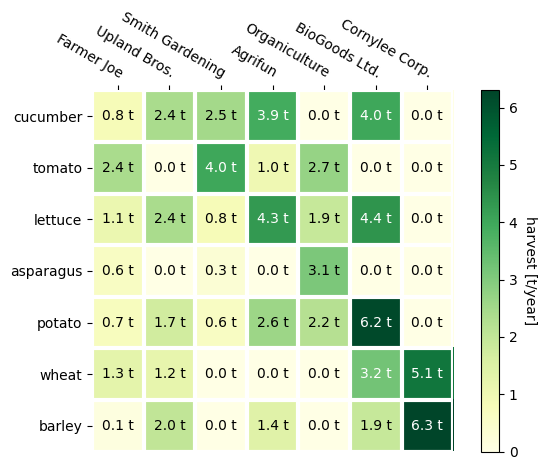

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import matplotlib as mpl

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([
    [0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]
])

def heatmap(data, row_labels, col_labels, ax=None, cbar_kw=None, cbarlabel="", **kwargs):
    if ax is None:
        ax = plt.gca()
    if cbar_kw is None:
        cbar_kw = {}
    im = ax.imshow(data, **kwargs)

    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    ax.set_xticks(range(data.shape[1]), labels=col_labels, rotation=-30,
                  ha="right", rotation_mode="anchor")
    ax.set_yticks(range(data.shape[0]), labels=row_labels)

    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    return im, cbar

def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"), threshold=None, **textkw):
    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max()) / 2.

    kw = dict(horizontalalignment="center", verticalalignment="center")
    kw.update(textkw)

    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)
    return texts

fig, ax = plt.subplots()
im, cbar = heatmap(harvest, vegetables, farmers, ax=ax, cmap="YlGn",
                   cbarlabel="harvest [t/year]")
texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()


# 4. Seaborn

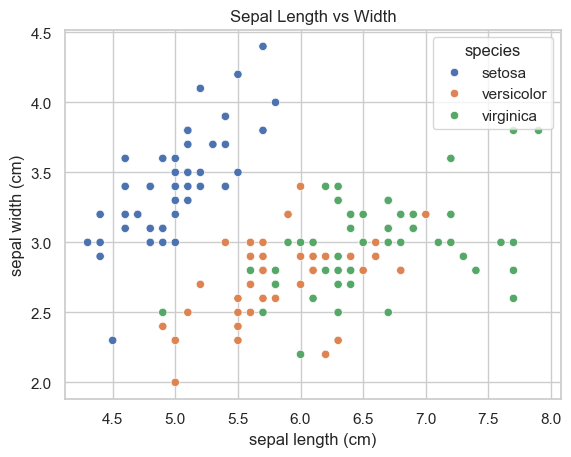

In [9]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Simple Seaborn scatter plot
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species')
plt.title("Sepal Length vs Width")
plt.show()

# 5. Scikit-learn

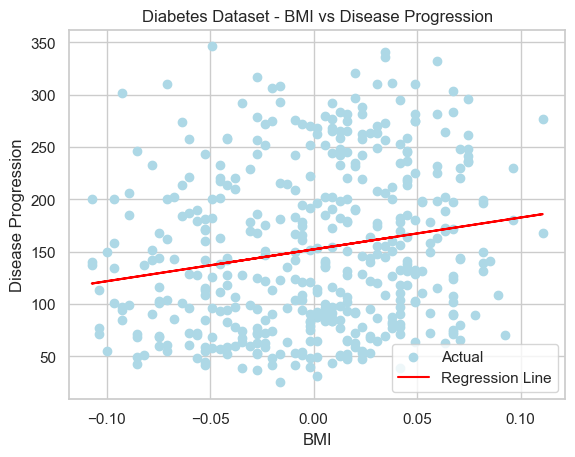

In [13]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load dataset
diabetes = load_diabetes()
X = diabetes.data[:, [0]]  # Use only one feature for line plot (e.g., BMI)
y = diabetes.target

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Plot
plt.scatter(X, y, color='lightblue', label='Actual')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title("Diabetes Dataset - BMI vs Disease Progression")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.legend()
plt.show()

# 6.SciPy

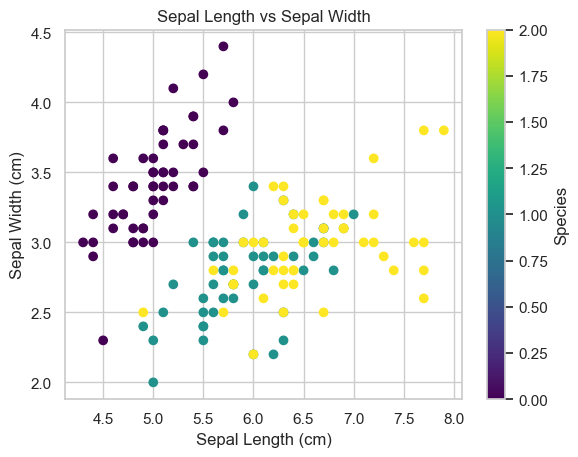

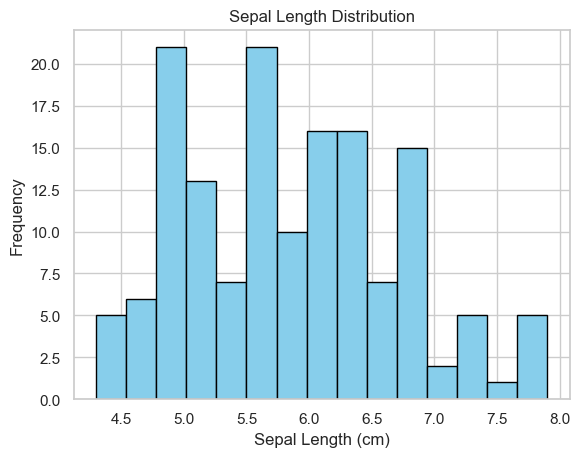

Pearson Correlation: -0.12


In [17]:
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy import stats

# Load dataset
iris = datasets.load_iris()
data = iris.data
target = iris.target

# Scatter plot (Sepal Length vs Sepal Width)
plt.scatter(data[:, 0], data[:, 1], c=target, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.colorbar(label='Species')
plt.show()

# Histogram (Sepal Length Distribution)
plt.hist(data[:, 0], bins=15, color='skyblue', edgecolor='black')
plt.title('Sepal Length Distribution')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()

# Correlation coefficient (Sepal Length and Sepal Width)
correlation, _ = stats.pearsonr(data[:, 0], data[:, 1])
print(f"Pearson Correlation: {correlation:.2f}")


# 7.Ploty

In [21]:
import plotly.express as px

# Load the inbuilt "tips" dataset
df = px.data.tips()

# Boxplot of tip distribution by day of the week
fig = px.box(df, x="day", y="tip", color="day", 
             title="Tip Distribution by Day", 
             labels={"day": "Day of the Week", "tip": "Tip ($)"})
fig.show()


C:\Users\Ashlesha Patil\anaconda3\Lib\site-packages\plotly\express\_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# 8. Statsmodels

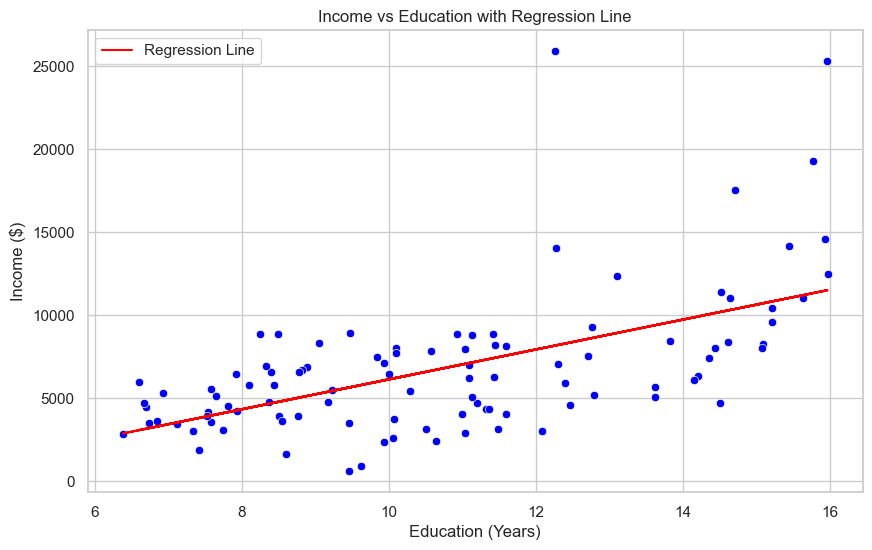

In [24]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the inbuilt 'Prestige' dataset from statsmodels
data = sm.datasets.get_rdataset('Prestige', package='carData').data

# Scatter plot of income vs education
plt.figure(figsize=(10, 6))
sns.scatterplot(x='education', y='income', data=data, color='blue')

# Fit a linear regression model using statsmodels
X = sm.add_constant(data['education'])  # Add constant term for the intercept
y = data['income']
model = sm.OLS(y, X).fit()

# Plot the regression line
plt.plot(data['education'], model.predict(X), color='red', label='Regression Line')

# Add labels and title
plt.xlabel('Education (Years)')
plt.ylabel('Income ($)')
plt.title('Income vs Education with Regression Line')
plt.legend()

# Show the plot
plt.show()

# 9.Keras

2/2 [==============================] - 0s 5ms/step


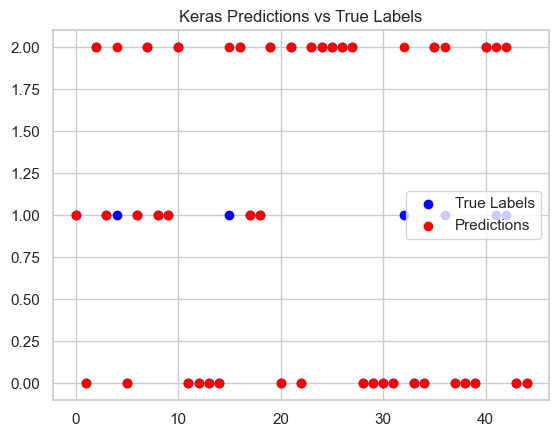

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and prepare the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Define, compile and train the model in one line using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=0)

# Predict and visualize
y_pred = np.argmax(model.predict(X_test), axis=1)
plt.scatter(range(len(y_test)), y_test, color='blue', label='True Labels')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predictions')
plt.legend()
plt.title('Keras Predictions vs True Labels')
plt.show()


# 10.TensorFlow

2/2 [==============================] - 0s 6ms/step


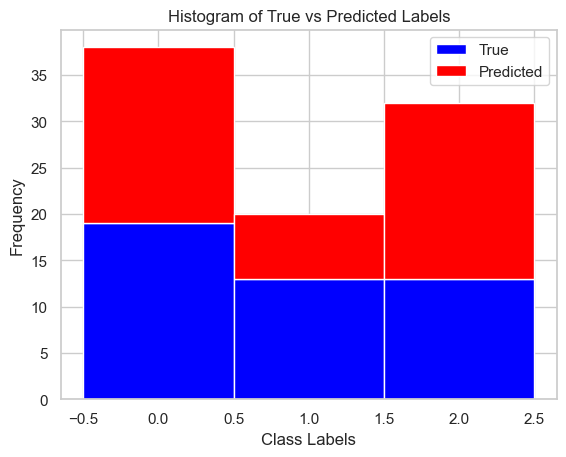

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load and preprocess data
iris = load_iris()
X = StandardScaler().fit_transform(iris.data)
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build and train the model
model = tf.keras.Sequential([tf.keras.layers.Dense(10, activation='relu', input_dim=X_train.shape[1]), tf.keras.layers.Dense(3, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Predict and plot histogram
y_pred = np.argmax(model.predict(X_test), axis=1)
plt.hist([y_test, y_pred], bins=np.arange(4) - 0.5, stacked=True, label=['True', 'Predicted'], color=['blue', 'red'])
plt.legend()
plt.title('Histogram of True vs Predicted Labels')
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.show()